<a href="https://colab.research.google.com/github/abhashjain9/EDA-Hotel-Booking-Analysis/blob/main/Team__final_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Mount the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing necessary packages**

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# **Reading Dataset**

In [ ]:
# Reading CSV file and loading it to dataframe.
file_path='//content/drive/MyDrive/AlmaBetter/capstone project/EDA/capstone project-1/Hotel Booking Analysis/Hotel Bookings.csv'
original_data=pd.read_csv(file_path)

In [ ]:
# Checking the info of dataframe.
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
original_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **Data Preprocessing**

In [ ]:
# Creating copy of data so that changes do not reflect back in the original data
data = original_data.copy()

## **Handling Missing Values**

In [ ]:
# Finding the missing values, by showing the total null values for each column and sorting it in descending order.
data.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

There are four features which have missing values.
*   Company
*   Agent
*   Country
*   Children








*   The features agent and company have id number for each agent and company,so we will replace missing values with zero.
*   The feature children contains the count of children, so we will replace all the missing values with the median value.
*   The feature country column contains country codes representing different countries. It is a categorical feature so we will replace it with the mode value.
[Handling missing values](https://pianalytix.com/how-do-you-handle-missing-values-categorical-data-and-feature-scaling-in-machine-learning/#:~:text=When%20missing%20values%20is%20from,replaced%20with%20a%20new%20category.). For reference

In [ ]:
# convert datatype of these columns from float to integer
data[['children', 'company', 'agent']] = data[['children', 'company', 'agent']].astype('int64')

In [ ]:
# Filling missing agent and company features value.
data['agent'].fillna(0,inplace=True)
data['company'].fillna(0,inplace=True)

# Filling missing children feature value.
data['children'].fillna(data['children'].median(),inplace=True)

# Filling missing country feature value.
data['country'].fillna(str(data['country'].mode()),inplace=True)

## **Looking at Outliers**

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**In the dataset there are binary features like 'is_canceled', 'is_repeated_guest' which are mapped to float data type.There are outliers also, as we can see mean and median difference is quiet large for most of the features.**

**Let's Check for outliers visually.**

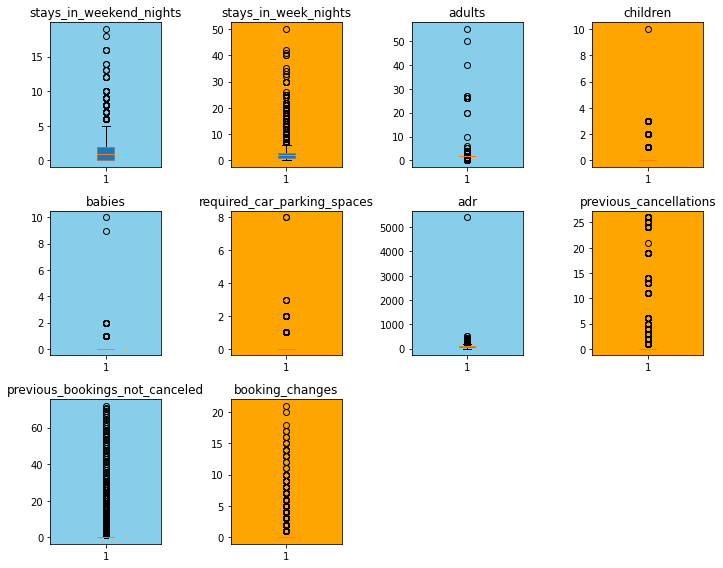

In [ ]:
# Taking columns of interest.
columns=['stays_in_weekend_nights','stays_in_week_nights', 'adults', 'children', 'babies','required_car_parking_spaces', 'adr','previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']

# Creating subplots.
fig,axs=plt.subplots(3,4,figsize=(10,8))

# Initiating figure row and column axes as 0.
row=0
col=0

# Plotting each feature's boxplot to check outliers.
for column in columns:
  axs[row,col].boxplot(data[column],patch_artist=True,boxprops=dict(color='grey'))
  # Using different set of colours fo sublots. 
  if col%2==0:
    axs[row,col].set_facecolor('skyblue')
  else:
    axs[row,col].set_facecolor('orange')

  # Setting the title.
  axs[row,col].set_title(str(column))
  col+=1

  # When col becomes equals to 4 then reset the value of col and increment the row by 1.
  if col==4:
    row+=1
    col=0

# Removing left out blank subplots.
for ind in range(-2,0):
  axs.flatten()[ind].set_visible(False)

fig.tight_layout()
plt.show()

## **Dealing with rows with no visitors.**

**Finding the number of rows which have no visitors. For this we will calculate total sum of adults,children and babies and we'll find those rows which have sum equal to zero.**

In [ ]:
print('The no. of rows which have no visitors',(data['adults']+data['children']+data['babies']==0).sum())

The no. of rows which have no visitors 180


**There are total 180 rows with no visitors.These rows having zero visitors make no sense, so we will remove these rows.**

In [ ]:
data.drop(data[data['adults']+data['children']+data['babies']==0].index,inplace=True)

# ***Exploratory Data Analysis(EDA)***

**Lets find corelation between numerical data.**




In [ ]:
num_data = data[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]


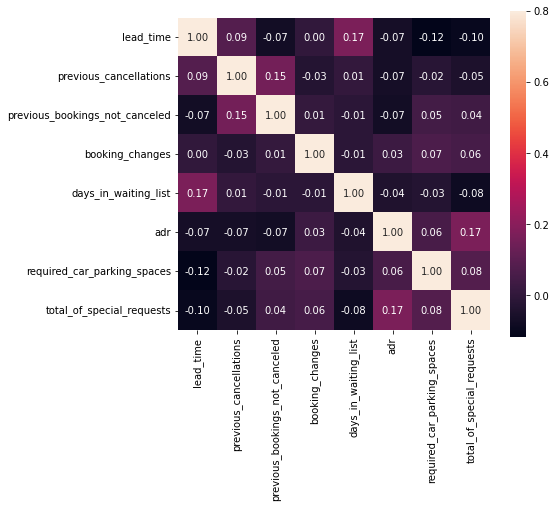

In [ ]:
#correlation matrix
corrmat = num_data.corr()
f, ax = plt.subplots(figsize=(7,6))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

**Inference** :

We can see that days_in_waiting_list is slightly corelated with lead_time.

adr is corelated to total_of special_requests.

## **BOOKING WISE ANALYSIS**

### **1.How many bookings got cancelled per year?**.

In [ ]:
# Calculating canceled bookings for each year.
bookings_canceled=data[data['is_canceled']==1].groupby('arrival_date_year')['is_canceled'].value_counts()
print(bookings_canceled)
years=[ele[0] for ele in bookings_canceled.index]
bookings=bookings_canceled.values

arrival_date_year  is_canceled
2015               1               8141
2016               1              20324
2017               1              15734
Name: is_canceled, dtype: int64


In [ ]:
# Calculating canceled bookings percentage.
bookings_canceled_percentage=(data['is_canceled']==1).sum()/len(data['is_canceled'])*100
print('The percentage of bookings canceled :',bookings_canceled_percentage,end='%')

The percentage of bookings canceled : 37.0765875346028%

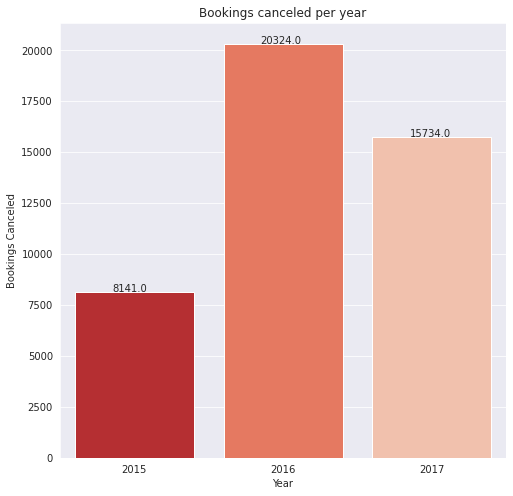

In [ ]:
# Setting the figure size.
plt.figure(figsize=(8,8))

# Setting the background.
sns.set_style('darkgrid')

# Using the countplot.
ax=sns.barplot(x=years,y=bookings,palette='Reds_r')

# Marking the height of each bar at top
for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x()+0.25, p.get_height()+0.01))

# Setting the labels.
plt.xlabel('Year')
plt.ylabel('Bookings Canceled')

# Setting the title
plt.title('Bookings canceled per year')

plt.show()

**Inference** :

* The 37% of bookings got cancelled.
*   In 2015, the 8141 bookings were canceled.
*   In 2016, the 20324 bookings were canceled.
*   In 2017, the 15734 bookings were canceled.





**The bookings which got canceled will not add any information for further analysis, so we will take only those rows for which bookings were not cancelled.**

In [ ]:
# Taking only those rows which were not cancelled
data_not_canceled=data[data['is_canceled']==0]

### **2.What is the booking difference between weekend and week days nights by hotel?**




In [ ]:
# Creating small dataframe which contains 'hotel','stays in weekend nights' and 'stays in week nights' features.
stay_df=data_not_canceled[['hotel','stays_in_weekend_nights','stays_in_week_nights']]

# Grouping the dataframe by hotel type.
stay_df.groupby('hotel')[['stays_in_weekend_nights','stays_in_week_nights']].sum()

,stays_in_weekend_nights,stays_in_week_nights
hotel,,
City Hotel,36817,97651
Resort Hotel,32798,87026


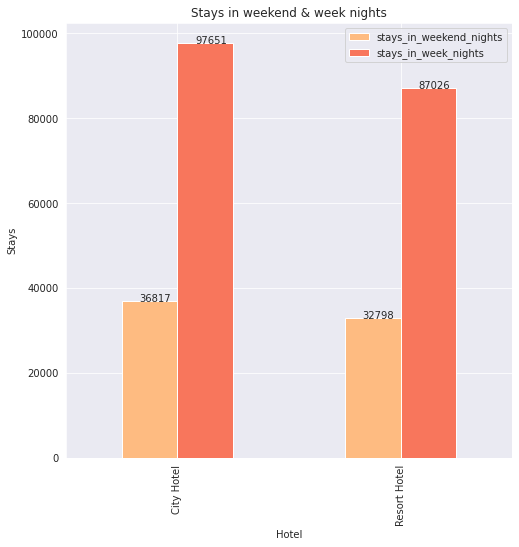

In [ ]:
# Creating dataframe for interested column.
stay_df=data_not_canceled[['hotel','stays_in_weekend_nights','stays_in_week_nights']]

# Groupby weekend and week days nights by hotel.
stay_df=stay_df.groupby('hotel')[['stays_in_weekend_nights','stays_in_week_nights']].sum()

# Setting the background.
sns.set_style('darkgrid')

# plot the bar chart.
ax=stay_df.plot.bar(figsize=(8,8),color=sns.color_palette('magma_r'))

# Marking the height of each bar at top.
for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x()+0.08, p.get_height()+0.01))

# Setting labels.
plt.xlabel("Hotel")
plt.ylabel("Stays")

# Adding legend.
plt.legend()

# Setting title.
plt.title("Stays in weekend & week nights")

# Showing the Curve.
plt.show()

**INFERENCE**

Total guest stays in week nights are 184677 in that 97651 stays in City hotel and 87026 stays in resort hotel.
Total guest stays in weekend nights are 69615 in that 36817 stays in City hotel and 32798 stays in resort hotel.

### **3.From which market segment bookings done the most?**

In [ ]:
# Finding bookings done per segment.
bookings_per_market_segment=data_not_canceled['market_segment'].value_counts()
print(bookings_per_market_segment)
bookings=bookings_per_market_segment.values
market_segments=bookings_per_market_segment.index


Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64


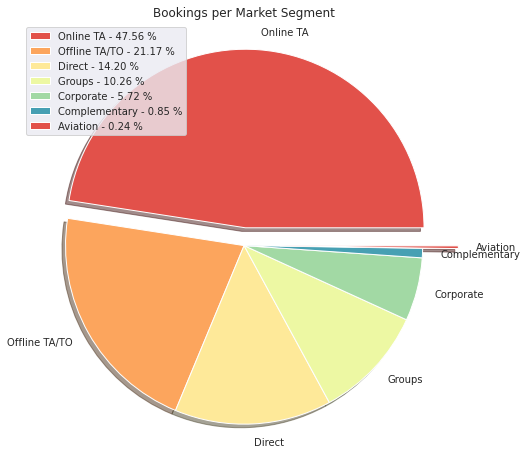

In [ ]:
# Plotting pie chart

# For seperating the segments, we are creating list which contains the seperation distance.
my_explode=[0]*7

# Exploding the first and last segments of the feature.
my_explode[0]=0.1
my_explode[6]=0.2

# Setting the figure sizez
plt.figure(figsize=(8,12))

# Choosing the colors for segments.
colors=sns.color_palette('Spectral')

# Using pie chart
patches,texts=plt.pie(bookings,explode=my_explode,labels=market_segments,colors=colors,shadow=True)

# Addings legends
percentages=100*(bookings/bookings.sum())
labels=['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(market_segments, percentages)]

plt.legend(patches,labels,loc='upper left')
plt.title('Bookings per Market Segment')
plt.show()

**INFERENCE**

Online TA & Offline TA/TO segments holds the major portion for bookings with 47.56% and 21.17%.

### **4.What is the booking percentage difference between city hotel and resort hotel?**

In [ ]:
# Finding the bookings doen per hotel type.
hotel_booking=data_not_canceled['hotel'].value_counts()
print(hotel_booking)
hotels=hotel_booking.index
bookings=hotel_booking.values

City Hotel      46084
Resort Hotel    28927
Name: hotel, dtype: int64


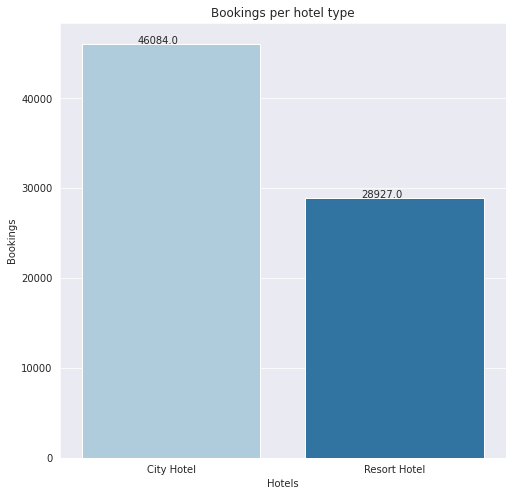

In [ ]:
# Setting the figure size.
plt.figure(figsize=(8,8))

# Setting the background.
sns.set_style('darkgrid')

#Plot the barplot
ax=sns.barplot(hotels,bookings,palette='Paired')

# Marking the height of each bar at the top.
for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x()+0.25, p.get_height()+0.01))

# Setting the labels
plt.xlabel('Hotels')
plt.ylabel('Bookings')

# Setting title
plt.title('Bookings per hotel type')

plt.show()

**INFERENCE**

More than 60% of the population booked the City hotel

### **5.What are the bookings percentage each year?**

In [ ]:
# Calculate number of booking per year
hotel_bookings_year=data_not_canceled['arrival_date_year'].value_counts().sort_index()
print(hotel_bookings_year)
years=hotel_bookings_year.index
bookings=hotel_bookings_year.values


2015    13826
2016    36299
2017    24886
Name: arrival_date_year, dtype: int64


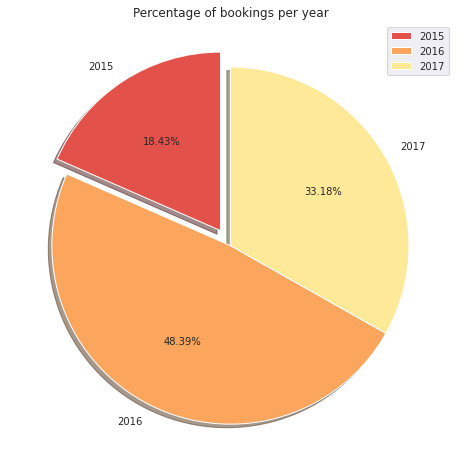

In [ ]:
# Plotting pie chart.

# For seperating the segments, we are creating list which contains the seperation distance.
my_explode=[0]*3

# Exploding the first segment of the feature.
my_explode[0]=0.1

# Setting the figure size.
plt.figure(figsize=(8,12))

# Choosing the colors for segments.
colors=sns.color_palette('Spectral')

# Using pie chart.
plt.pie(bookings,explode=my_explode,labels=years,colors=colors,shadow=True,autopct='%1.2f%%',startangle=90)

# Addings legends
plt.legend(loc='upper right')
plt.title('Percentage of bookings per year')
plt.show()

**INFERENCE**

More bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.

## **GUEST WISE ANALYSIS**

### **1.How many guests repeated each year?**

In [ ]:
# Taking only those rows which were not cancelled.
data_not_canceled=data[data['is_canceled']==0]
data_not_canceled.groupby('arrival_date_year')['is_repeated_guest'].value_counts()

arrival_date_year  is_repeated_guest
2015               0                    13546
                   1                      280
2016               0                    34680
                   1                     1619
2017               0                    23580
                   1                     1306
Name: is_repeated_guest, dtype: int64

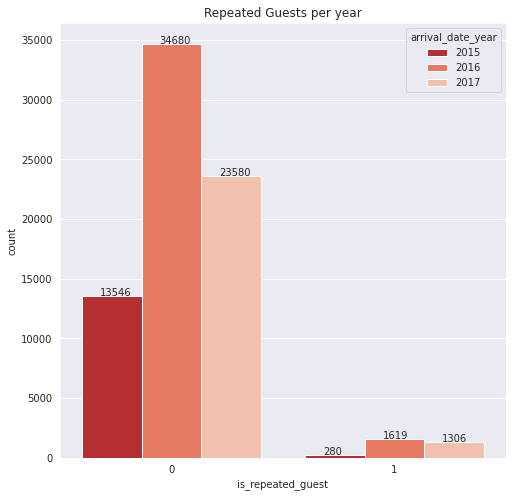

In [ ]:
# Setting figure size
plt.figure(figsize=(8,8))

# Setting background
sns.set_style('darkgrid')

# Plotting countplot
ax=sns.countplot(x='is_repeated_guest',data=data_not_canceled,hue='arrival_date_year',palette='Reds_r')

# Marking height of each bar at top
for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x()+0.08, p.get_height()+0.01))

# Adding the title
plt.title('Repeated Guests per year')

plt.show()

**INFERENCE**

 The 280 guests were repeated in the year 2015 , 1619 guests were repeated in the year 2016 and 1306 guests were repeated in the year 2017.

## **TYPE OF VISITORS**

### **1.Which is the most booked accomodation type?**

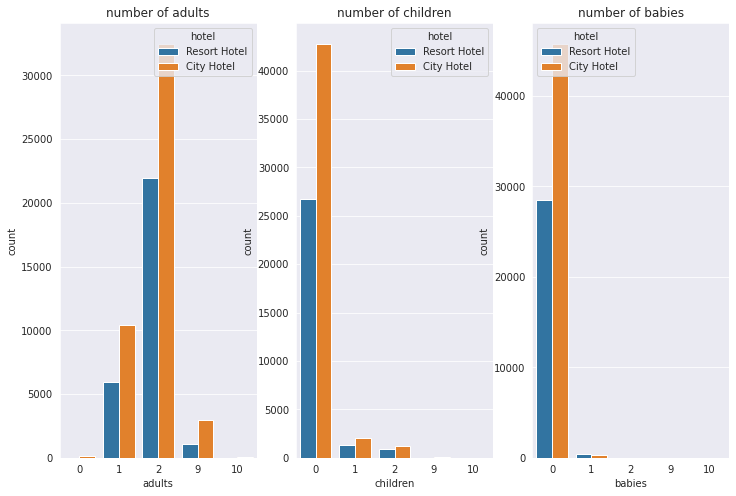

In [ ]:
# Count plot for adult,children and babies in a row.
fig,axes=plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(12,8))
# setting x_axis and title for adults.
sns.countplot(ax=axes[0],data=data_not_canceled,x='adults',hue='hotel').set_title('number of adults')
# setting x_axis and title for children.
sns.countplot(ax=axes[1],data=data_not_canceled,x='children',hue='hotel').set_title('number of children')
# setting x_axis and title for babies.
sns.countplot(ax=axes[2],data=data_not_canceled,x='babies',hue='hotel').set_title('number of babies')
# show the plot
plt.show()

**INFERENCE**

Majority of visitors travel with pairs,very few with children and babies.The visitors with babies prefer mostly the resort hotel.

### **2.From which country visitors comes the most?**

In [ ]:
# Finding top 10 countires with number of visitors from each one of them.
top_10_countries_visitors=data['country'].value_counts()[:10]
print(top_10_countries_visitors)
num_of_visitors=top_10_countries_visitors
top_10_countries=top_10_countries_visitors.index

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
ITA     3761
IRL     3374
BEL     2342
BRA     2222
NLD     2103
Name: country, dtype: int64


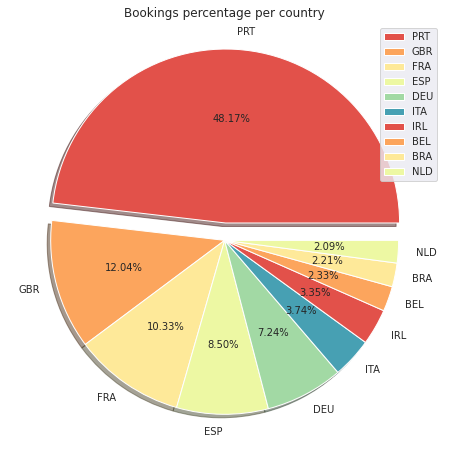

In [ ]:
# Plotting pie chart

# For seperating the segments, we are creating list which contains the seperation distance.
my_explode=[0]*10

# Exploding the first segment which is the country that has most number of visitors
my_explode[0]=0.1 

# Setting the figure size.
plt.figure(figsize=(8,8))

# Setting the colors
colors=sns.color_palette('Spectral')
# Using pie chart
plt.pie(num_of_visitors,explode=my_explode,labels=top_10_countries,colors=colors,autopct='%1.2f%%',shadow=True)
# Adding legends
plt.legend()
# Setting the title.
plt.title('Bookings percentage per country')
plt.show()

**INFERENCE**  

The majority of the bookings are from Portugal. The countries UK,France,Spain and Germany also holds a great portion in bookings.The approx 70% comes from these 5 countries.

## **MONTH WISE ANALYSIS**

### **1.Which is the most occupied month for hotels?**

In [ ]:
# Setting the indices month wise in general.
ind=['January','February','March','April', 'May','June','July','August','September','October',
     'November', 'December']
hotel_monthly_bookings=data['arrival_date_month'].value_counts().reindex(ind)
print(hotel_monthly_bookings)
hotel_bookings=hotel_monthly_bookings.values
months=hotel_monthly_bookings.index

January       5921
February      8052
March         9768
April        11078
May          11780
June         10929
July         12644
August       13861
September    10500
October      11147
November      6771
December      6759
Name: arrival_date_month, dtype: int64


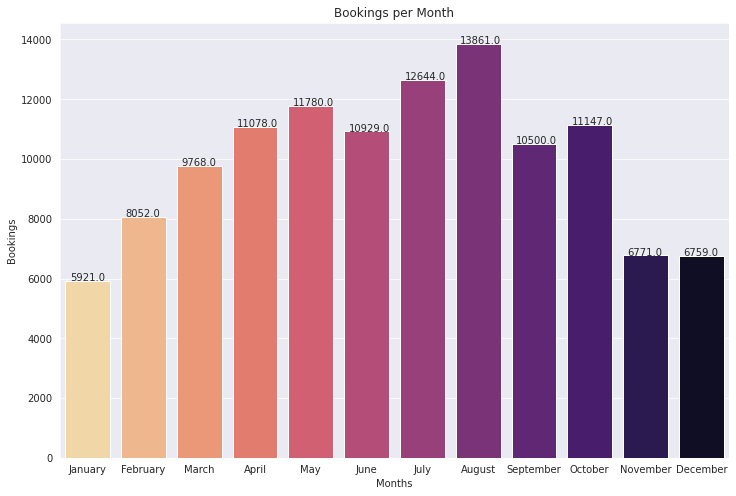

In [ ]:
# Setting the figure size.
plt.figure(figsize=(12,8))

# Using barplot.
ax=sns.barplot(months,hotel_bookings,palette='magma_r')

# Marking the height of each bar at the top.
for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x()+0.08, p.get_height()+0.01))

# Setting the labels and title.
plt.xlabel('Months')
plt.ylabel('Bookings')
plt.title('Bookings per Month')
plt.show()

**INFERENCE**

In the month of August ,maximum number of bookings were made. Then the second number of majority of bookings were made in the month of July. In the month January there are least number of bookings.

### **2.What is the average daily rate for each month per hotel type?**

In [ ]:
# Calculating adr for each month per hotel type.
months=['January','February','March','April', 'May','June','July','August','September','October',
     'November', 'December']
city_hotel_adr=data[data['hotel']=='City Hotel'].groupby('arrival_date_month')['adr'].sum().reindex(ind).values
resort_hotel_adr=data[data['hotel']=='Resort Hotel'].groupby('arrival_date_month')['adr'].sum().reindex(ind).values
adr_df=pd.DataFrame({'Months':months,'City_Hotel_adr':city_hotel_adr,'Resort_hotel_adr':resort_hotel_adr})
adr_df

,Months,City_Hotel_adr,Resort_hotel_adr
0,January,308674.20,108469.91
1,February,422371.22,171198.50
2,March,598190.46,191887.21
3,April,832027.29,280958.83
4,May,1001026.89,280300.20
5,June,939782.05,336304.26
6,July,895444.76,709644.08
7,August,1029925.68,914153.07
8,September,814009.23,289827.31
9,October,760306.06,220757.03


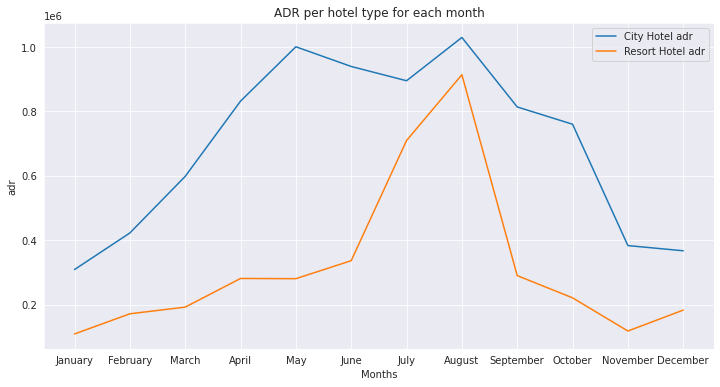

In [ ]:
# Setting the figure size
plt.figure(figsize=(12,6))

# Setting the background.
sns.set_style('darkgrid')

# Plotting the line plots.
ax=sns.lineplot(months,city_hotel_adr,label='City Hotel adr')
sns.lineplot(months,resort_hotel_adr,label='Resort Hotel adr')

# Setting the labels
plt.xlabel('Months')
plt.ylabel('adr')

# Setting the title
plt.title('ADR per hotel type for each month')
plt.show()

**INFERENCE**:

*   The adr for City Hotel is highest for the months May and August.
*   The adr for Resort Hotel is highest for the August month.
*   The adr for City Hotel is more expensive than Resort Hotel for each month.




## **ROOM WISE ANALYSIS**

### **1.Which room type have the most demand?**

In [ ]:
# Calculating bookings for each room type.
room_type_bookings=data_not_canceled['reserved_room_type'].value_counts().sort_index()
print(room_type_bookings)
room_types=room_type_bookings.index
bookings=room_type_bookings.values

A    52248
B      748
C      623
D    13078
E     4611
F     2014
G     1329
H      356
L        4
Name: reserved_room_type, dtype: int64


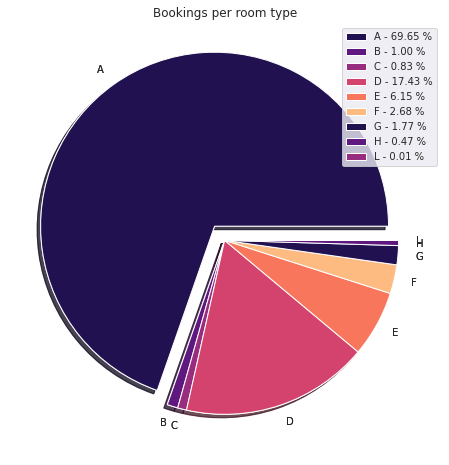

In [ ]:
# Plotting pie chart

# For seperating the segments, we are creating list which contains the seperation distance.
my_explode=[0]*9

# Exploding the first segment which is the country that has most number of visitors
my_explode[0]=0.1 

# Setting the figure size.
plt.figure(figsize=(8,8))

# Setting the colors
colors=sns.color_palette('magma')
# Using pie chart
plt.pie(bookings,explode=my_explode,labels=room_types,colors=colors,shadow=True)
# Adding legends
# Using pie chart
patches,texts=plt.pie(bookings,explode=my_explode,labels=room_types,colors=colors,shadow=True)

# Addings legends
percentages=100*(bookings/bookings.sum())
labels=['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(room_types, percentages)]

plt.legend(patches,labels,loc='upper right')
# Setting the title.
plt.title('Bookings per room type')
plt.show()

**INFERENCE**

The room type 'A' have the most demand.

### **2.How many rooms wrongly assigned to with respect to booked room type by each hotel?**

In [ ]:
def check_assignment(str1,str2):
  '''
  This function check reserved room assigened correct or wrong
  '''
  if str1==str2: # check the condition
    value=0
  else:
    value=1
  return value

In [ ]:
# create small datafram of intesed columes
assignment_df=data_not_canceled[['hotel','reserved_room_type','assigned_room_type']]
# apply check_assignment function
assignment_df['Wrong_assigned_room']=assignment_df.apply(lambda x:check_assignment(x['reserved_room_type'],x['assigned_room_type']),axis=1)
#group by hotel with room assigned
assignment_df=assignment_df.groupby('hotel').agg({'reserved_room_type':'count','Wrong_assigned_room':'sum'})

assignment_df

,reserved_room_type,Wrong_assigned_room
hotel,,
City Hotel,46084,6661
Resort Hotel,28927,7334


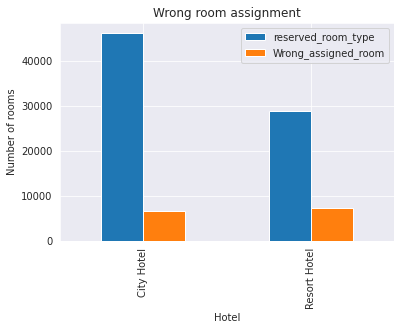

In [ ]:
# Plotting graph.
assignment_df.plot.bar()
   
# Setting the labels.
plt.xlabel("Hotel")
plt.ylabel("Number of rooms")

# Adding legends.
plt.legend()

# Setting the title.
plt.title("Wrong room assignment")

plt.show()

**INFERENCE**

In resort hotel 7334 room assigned wrong i.e 25.4% of total reserved room type in resort hotel.
In city hotel 6661 room assigned wrong i.e 14.5% of total reserved room type in city hotel.


### **3.Which room type generates highest adr?**

In [ ]:
# Calculating adr for each room type.
room_types_adr=data_not_canceled.groupby('assigned_room_type')['adr'].sum()
print(room_types_adr)
room_types=room_types_adr.index
adr=room_types_adr.values

assigned_room_type
A    3809562.30
B     155964.40
C     205500.21
D    1911498.99
E     650686.17
F     401078.89
G     279693.38
H      72820.78
I      14357.79
K      12629.85
Name: adr, dtype: float64


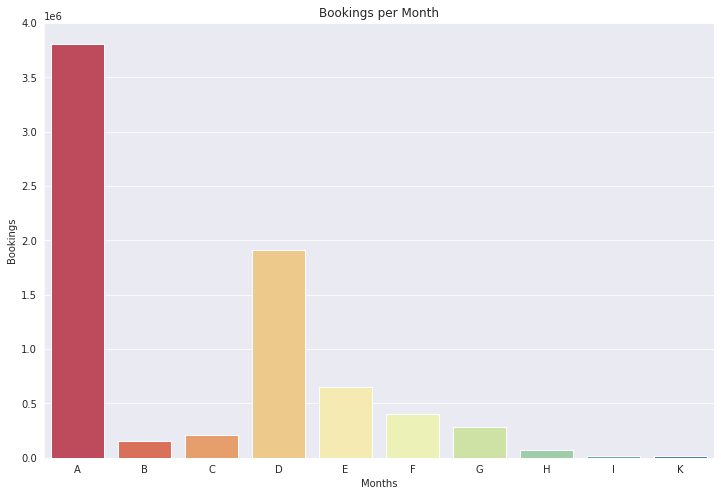

In [ ]:
# Setting the figure size.
plt.figure(figsize=(12,8))

# Using barplot.
ax=sns.barplot(room_types,adr,palette='Spectral')

# Setting the labels and title.
plt.xlabel('Months')
plt.ylabel('Bookings')
plt.title('Bookings per Month')
plt.show()

**INFERENCE**

The room type 'A' have the highest adr.

# **Summary:**

We first decided to take up this project solely due to our mutual interest in hotel booking.Then we decided first work individually gaining insights doing some eda etc.we started to form the questions and we discussed with team member.After doing some random EDAs.we gained some confidence.

We used the given dataset that contains data about hotel bookings between 2015-2017 like booking canelled,booking channels,booking date etc.
We cleaned and preprocessed the data and then we performed the exploratory data analysis to extract information from the data to answer the following questions.

BOOKING WISE ANALYSIS
1.   How many booking cancelled each year ?
2.   What is the booking difference between weekend and week days nights by hotel?
3.  From which market segment bookings done the most?
 
4. What is the booking percentage difference between city hotel and resort hotel?  
5.  What are the bookings percentage each year??   


GUEST WISE ANALYSIS

1. How many guests repeated each year?

TYPE OF VISITORS

 1. Which is the most booked accomodation type?

 2. From which country visitors comes the most?

MONTH WISE ANALYSIS

 1. Which is the most occupied month for hotels?
 2. What is the average daily rate for each month per hotel type?



ROOM WISE ANALYSIS
1. Which room type have the most demand and which room type generates highest adr?
2. How many rooms wrongly assigned to guests with respect to booked room type by each hotel?
3. Which room type generates highest adr?











# **Conclusion**

BOOKING WISE ANALYSIS
1.   The total bookings got canceled 44199 i.e. 37% of total booking. Most of the booking cancelled for City Hotel during the year of 2016 and 2017 that is 61% of total booking canceled.
2.   The total bookings got canceled 44199 i.e. 37% of total booking. Most of the booking cancelled for City Hotel during the year of 2016 and 2017 that is 61% of total booking canceled 
3. More than 60% of the population booked the City hotel
4. More bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 14% the next year.
5. As we can see from analysis most bookings were made by online TA market segment. And the least bookings were made by aviation and complementary market segment.

GUEST WISE ANALYSIS

1. In resort hotel 7334 room assigned wrong i.e 25.4% of total reserved room type in resort hotel. In city hotel 6661 room assigned wrong i.e 14.5% of total reserved room type in city hotel.
2. The 280 guests were repeated in the year 2015 , 1619 guests were repeated in the year 2016 and 1306 guests were repeated in the year 2017.

TYPE OF VISITORS
1. Majority of visitors travel with family.The visitors with babies prefer mostly the resort hotel
2. The majority of the bookings are from Portugal. The countries UK,France,Spain and Germany also holds a great portion in bookings.The approx 70% comes from these 5 countries.

MONTH WISE ANALYSIS
1. In the month of August ,maximum number of bookings were made. Then the second number of majority of bookings were made in the month of July. In the month January there are least number of bookings.
2. The adr for City Hotel is highest for the months May and August, the adr for Resort Hotel is highest for the August month and the adr for City Hotel is more expensive than Resort Hotel for each month.



ROOM WISE ANALYSIS
1. The room type 'A' have the most demand and the adr is also high.

2. In resort hotel 7334 room assigned wrong i.e 25.4% of total reserved room type in resort hotel. In city hotel 6661 room assigned wrong i.e 14.5% of total reserved room type in city hotel.

3. The room type 'A' have the highest adr.





# **Challenges Faced**

*   There were missing values present in the dataset.
*   The datatypes of some of the features were wrongly matched.
* A lot of null dataset.
* Chooseing appropiate visualization techniques to use was difficult.

